In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import hera_pspec as hp
from pyuvdata import UVData
from scipy import stats
from scipy.stats import norm
from scipy.optimize import curve_fit
import pyuvdata.utils as uvutils

In [2]:
# Load beam model
beamfile = 'HERA_NF_dipole_power.beamfits'
cosmo = hp.conversions.Cosmo_Conversions()
uvb = hp.pspecbeam.PSpecBeamUV(beamfile, cosmo=cosmo)

In [3]:
# Load data into UVData objects
dfile = 'zen.2458101.clean-002.uvh5' #zen.2458116.34176.xx.HH.uvOCRS #zen.2458101.clean-002.uvh5 #zen.2458101.xtmdl.uvh5
uvd = UVData()
uvd.read(dfile)

In [4]:
uvd1 = uvd.select(times=np.unique(uvd.time_array)[16:44:2], inplace=False)
uvd2 = uvd.select(times=np.unique(uvd.time_array)[17:45:2], inplace=False)
ds = hp.PSpecData(dsets=[uvd1, uvd2], wgts=[None, None], beam=uvb)
ds.rephase_to_dset(0)
baselines = [(66, 67), (83, 84), (37, 38)]
uvp = ds.pspec(baselines, baselines, (0, 1), [('xx', 'xx')], spw_ranges=[(300, 400), (520, 690)],  input_data_weight='identity',
               norm='I', taper='blackman-harris', verbose=False) 

In [5]:
spw = 1
dlys = uvp.get_dlys(spw) * 1e9

blp = ((66, 67), (66, 67))
key1 = (spw, blp, 'xx')
cpower1 = np.real(uvp.get_data(key1))

blp = ((83, 84), (83, 84))
key2 = (spw, blp, 'xx')
cpower2 = np.real(uvp.get_data(key2))

blp = ((37, 38), (37, 38))
key3 = (spw, blp, 'xx')
cpower3 = np.real(uvp.get_data(key3))

In [6]:
cpower = {0:cpower1, 1:cpower2, 2:cpower3}
key = {0:key1, 1:key2, 3:key3}

In [7]:
mdfile = 'zen.2458101.xtmdl.uvh5' #zen.2458116.34176.xx.HH.uvOCRS #zen.2458101.clean-002.uvh5 #zen.2458101.xtmdl.uvh5
muvd = UVData()
muvd.read(mdfile)

In [8]:
bl1 = (66, 67, 'xx')
bl2 = (83, 84, 'xx')
bl3 = (37, 38, 'xx')

In [9]:
blt_inds = uvd.antpair2ind(bl1)
uvd.data_array[blt_inds, 0, :, 0] -= muvd.get_data(bl1)

blt_inds = uvd.antpair2ind(bl2)
uvd.data_array[blt_inds, 0, :, 0] -= muvd.get_data(bl2)

blt_inds = uvd.antpair2ind(bl3)
uvd.data_array[blt_inds, 0, :, 0] -= muvd.get_data(bl3)

In [10]:
# We only have 1 data file here, so slide the time axis by one integration 
# to avoid noise bias (not normally needed!)
uvd1 = uvd.select(times=np.unique(uvd.time_array)[16:44:2], inplace=False)
uvd2 = uvd.select(times=np.unique(uvd.time_array)[17:45:2], inplace=False)

In [11]:
# Create a new PSpecData object
ds = hp.PSpecData(dsets=[uvd1, uvd2], wgts=[None, None], beam=uvb)
ds.rephase_to_dset(0) # Phase to the zeroth dataset

In [12]:
# Specify which baselines to include
baselines = [(66, 67), (83, 84), (37, 38)]
# baselines = [(66, 67), (83, 84), (69, 70)]
# baselines = [(37, 38), (83, 84), (69, 70)]

# Define uvp
uvp = ds.pspec(baselines, baselines, (0, 1), [('xx', 'xx')], spw_ranges=[(300, 400), (520, 690)],  input_data_weight='identity',
               norm='I', taper='blackman-harris', verbose=True) 


Setting spectral range: (300, 400)

Using polarization pair: ('xx', 'xx')

(bl1, bl2) pair: ((66, 67), (66, 67))
pol: (-5, -5)
  Building G...
  Building q_hat...
  Normalizing power spectrum...
  Computing and multiplying scalar...

(bl1, bl2) pair: ((83, 84), (83, 84))
pol: (-5, -5)
  Building q_hat...
  Normalizing power spectrum...
  Computing and multiplying scalar...

(bl1, bl2) pair: ((37, 38), (37, 38))
pol: (-5, -5)
  Building q_hat...
  Normalizing power spectrum...
  Computing and multiplying scalar...

Setting spectral range: (520, 690)

Using polarization pair: ('xx', 'xx')

(bl1, bl2) pair: ((66, 67), (66, 67))
pol: (-5, -5)
  Building G...
  Building q_hat...
  Normalizing power spectrum...
  Computing and multiplying scalar...

(bl1, bl2) pair: ((83, 84), (83, 84))
pol: (-5, -5)
  Building q_hat...
  Normalizing power spectrum...
  Computing and multiplying scalar...

(bl1, bl2) pair: ((37, 38), (37, 38))
pol: (-5, -5)
  Building q_hat...
  Normalizing power spectrum..

Text(0.5, 1.0, 'spw : 1, blpair : ((66, 67), (66, 67)), pol : xx')

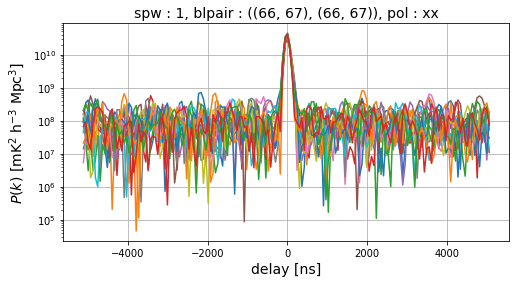

In [16]:
# with cable reflection #1
spw = 1
blp = ((66, 67), (66, 67))
# blp = ((37, 38), (37, 38))
key1 = (spw, blp, 'xx')
dlys = uvp.get_dlys(spw) * 1e9
power1 = np.real(uvp.get_data(key1))

# plot power spectrum of spectral window 1
fig, ax = plt.subplots(figsize=(8,4))
p1 = ax.plot(dlys, np.abs(power1).T)
ax.set_yscale('log')
ax.grid()
ax.set_xlabel("delay [ns]", fontsize=14)
ax.set_ylabel(r"$P(k)\ \rm [mK^2\ h^{-3}\ Mpc^3]$", fontsize=14)
ax.set_title("spw : {}, blpair : {}, pol : {}".format(*key1), fontsize=14)

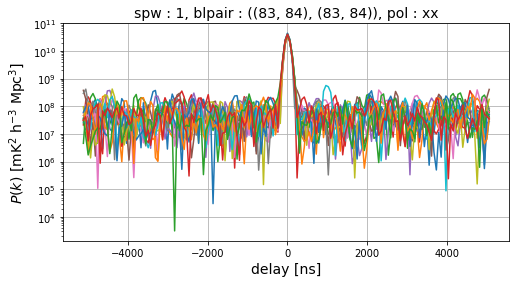

In [17]:
# no cable reflection #1
spw = 1
blp = ((83, 84), (83, 84))
# blp = ((82, 120), (82, 120))
key2 = (spw, blp, 'xx')
dlys = uvp.get_dlys(spw) * 1e9
power2 = np.real(uvp.get_data(key2))

# plot power spectrum of spectral window 1
plt.figure(figsize=(8,4))
plt.semilogy(dlys, np.abs(power2).T)
plt.grid()
plt.xlabel("delay [ns]", fontsize=14)
plt.ylabel(r"$P(k)\ \rm [mK^2\ h^{-3}\ Mpc^3]$", fontsize=14)
plt.title("spw : {}, blpair : {}, pol : {}".format(*key2), fontsize=14)
plt.show()

Text(0.5, 1.0, 'spw : 1, blpair : ((37, 38), (37, 38)), pol : xx')

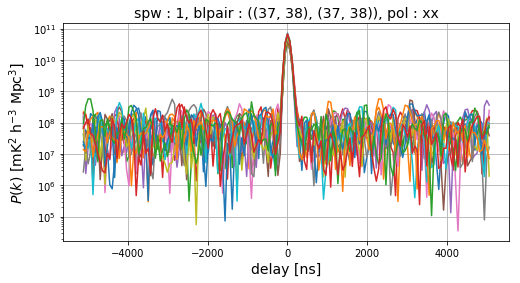

In [18]:
# no cable reflection #2
spw = 1
blp = ((37, 38), (37, 38))
# blp = ((69, 70), (69, 70))
key3 = (spw, blp, 'xx')
dlys = uvp.get_dlys(spw) * 1e9
power3 = np.real(uvp.get_data(key3))

# plot power spectrum of spectral window 1
fig, ax = plt.subplots(figsize=(8,4))
p1 = ax.plot(dlys, np.abs(power3).T)
ax.set_yscale('log')
ax.grid()
ax.set_xlabel("delay [ns]", fontsize=14)
ax.set_ylabel(r"$P(k)\ \rm [mK^2\ h^{-3}\ Mpc^3]$", fontsize=14)
ax.set_title("spw : {}, blpair : {}, pol : {}".format(*key3), fontsize=14)

In [19]:
def ks_test(data, pdf, guess_args):
    """
    H0: the data follow a given distribution
    d < critical value (cv)  -->> accept H0
    
    Parameters
    ----------
    data: 1d array
        empirical data 
    pdf: callable
        probability density function
    guess_args: float, 1d array
        pdf parameters guess
        
    Returns
    -------
    d: float
        KS-test stats
    cv: float
        critical value (Significance level:  α = 0.05)
    m: Boolean
        KS-test result: Accept H0 (True); reject H0 (False)
    """
    
    # get CDF of empirical data
    counts, bin_edges = np.histogram (data, bins=len(data), density=True)
    ecdf = np.cumsum(counts)/(np.cumsum(counts)[-1])
    
    # fit data to the model 
    y, x = np.histogram(data, bins='auto', density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0
    popt, pcov = curve_fit(pdf, x, y, p0=guess_args)
    
    # compute CDF from the fitted PDF
    cdf_scaled = np.cumsum(pdf(bin_edges[1:], *popt))
    cdf = cdf_scaled/cdf_scaled[-1]
    
    # perform KS-test
#     gaps = np.column_stack([cdf - ecdf, ecdf - cdf])
    d = np.max(np.abs(cdf-ecdf))
#     cv = 1.36/np.sqrt(len(data))  # 0.05
#     cv = 1.62762/np.sqrt(len(data)) # 0.01
    cv = 1.22/np.sqrt(len(data)) # 0.10
    if d < cv:
        m = True
    if d > cv:
        m = False
    
    return [d, cv, m]

def real_pdf(z, s):
    a = 1/(s)
    b = (-np.abs(2*z))/(s)
    return a*np.exp(b)

def null_pdf(x, s):
    return (1/(2*s**2))*np.exp(-2*np.abs(x)/(s))*(s+2*np.abs(x))

def null_cdf(data, s):
    counts, bin_edges = np.histogram(data, bins=len(data), density=True)
    cdf = np.cumsum(null_pdf(bin_edges[1:], s))
    return cdf/cdf[-1]

def real_cdf(data, s):
    counts, bin_edges = np.histogram(data, bins=len(data), density=True)
    cdf = np.cumsum(real_pdf(bin_edges[1:], s))
    return cdf/cdf[-1]

In [31]:
def bayes_factor_approx(data, m1, m2):
    """
    Compute the approximation value of bayes factor of a set of data fitted to two PDF models.
    
    Parameters
    ----------
    data : array_like
           Input data. The BIC is computed over the flattened array.
    m1, m2 : callable
           Models. Normal distribution is 'norm'.
    
    Returns
    -------
    s : float
           Return the Schwarz criterion.
    """

    # get histogram data
    y, x = np.histogram(data, bins='auto', density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0
    
    # fit the models
    popt1 = curve_fit(m1, x, y, p0=np.std(data))[0]
#     popt1 = curve_fit(m1, x, y)[0]
    if m2 == 'norm':
        popt2 = norm.fit(data)
    else:
        popt2 = curve_fit(m2, x, y, p0=np.std(data))[0]
#         popt2 = curve_fit(m2, x, y)[0]
    
    n = len(data)
        
    # compute S
    bic1 = sum(np.log(m1(data, *popt1)))
    if m2 == 'norm':
        bic2 = sum(np.log(norm.pdf(data, *popt2)))
    else:
        bic2 = sum(np.log(m2(data, *popt2)))
    p = (len(popt1)-len(popt2))/np.log(n)
    s = 2*(bic1-bic2-0.5*p)

    return s

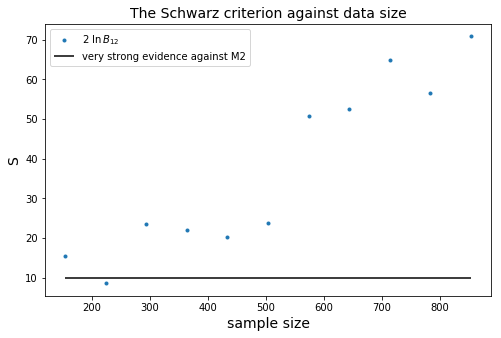

In [40]:
# compute BICs
bics = []
size = []
for i in range(11):
    x = power1[:,107:118+5*i].flatten()
    size.append(len(x))
    bics.append(bayes_factor_approx(x, real_pdf, 'norm'))
    

# plot data points over BIC values
plt.figure(figsize=(8, 5))
plt.plot(size, bics, '.', label="2 $\ln\,{B_{12}}$")
plt.hlines(10, size[0], size[-1], label="very strong evidence against M2")
plt.xlabel("sample size", fontsize=14)
plt.ylabel("S", fontsize=14)
plt.title("The Schwarz criterion against data size", fontsize=14)
plt.legend(loc='best', fontsize=10)
plt.show()

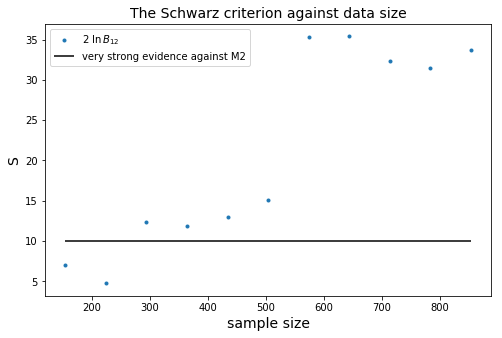

In [53]:
bics = []
size = []
for i in range(11):
    x = power2[:,107:118+5*i].flatten() - power1[:,107:118+5*i].flatten()
    size.append(len(x))
    bics.append(bayes_factor_approx(x, null_pdf, 'norm'))
    

plt.figure(figsize=(8, 5))
plt.plot(size, bics, '.', label="2 $\ln\,{B_{12}}$")
plt.hlines(10, size[0], size[-1], label="very strong evidence against M2")
plt.xlabel("sample size", fontsize=14)
plt.ylabel("S", fontsize=14)
plt.title("The Schwarz criterion against data size", fontsize=14)
plt.legend(loc='best', fontsize=10)
plt.show()

In [20]:
# Number of groups which rejects H0 (don't have the same mean)
# count = {}

power = {0: power1, 1:power2, 2:power3}
key = {0: key1, 1:key2, 3:key3}

# # Set delay domain
# dly = [-5000, 5000]
# # Number of groups going through the test
# dly_rg = 200
# # Red vertical lines that divides power data into dly_rg groups
# lines = []
# # Total number of power in one group for one baseline pair
# total = 0

In [22]:
def clean_null_test(dly1, dly2, avg):
    # null test
    dly_modes = [dly1, dly2] # ns
    dly_idx = [(np.abs(dlys - dly_modes[0])).argmin(), (np.abs(dlys - dly_modes[1])).argmin()]

    # Fit real power values (only for power1 (systematics) and power3 (control))
    power_data = []
    power_popt = []
    power_dn = []
    power_cv = []
    for i in range(2):
        if i == 0 and avg == 'no':
            data = cpower1[:,dly_idx[0]:dly_idx[1]].flatten()
        elif i == 0 and avg == 'time':
            data = np.mean(cpower1[:,dly_idx[0]:dly_idx[1]], axis=1)
        elif i == 0 and avg == 'delay':
            data = np.mean(cpower1[:,dly_idx[0]:dly_idx[1]], axis=0)
        elif i == 1 and avg == 'no':
            data = cpower3[:,dly_idx[0]:dly_idx[1]].flatten()
        elif i == 1 and avg == 'time':
            data = np.mean(cpower3[:,dly_idx[0]:dly_idx[1]], axis=1)
        elif i == 1 and avg == 'delay':
            data = np.mean(cpower3[:,dly_idx[0]:dly_idx[1]], axis=0) 
        
        power_data.append(data)
        
        y, x = np.histogram(data, bins='auto', density=True)
        x = (x + np.roll(x, -1))[:-1] / 2.0
        poptt = curve_fit(real_pdf, x, y, p0=np.std(data))[0]
        power_popt.append(poptt)

        # KS-test for power fitting
        counts, bin_edges = np.histogram (data, bins='auto', density=True)
        cdf = np.cumsum(counts)
        bin_edges_m = (bin_edges + np.roll(bin_edges, -1))[:-1] / 2.0
        cdf_fit = np.cumsum(real_pdf(bin_edges_m[:], poptt))
        power_dn.append(max(np.abs(cdf_fit/cdf_fit[-1]-cdf/cdf[-1])))
        power_cv.append(ks_test(data, real_pdf, np.std(data))[1])
        
        
    # Perform null test
    diff = {}
    for i in range(2):
        power_a = cpower[i] # i=0>>>power1, i=1>>>power2
        power_b = cpower[i+1] # i=0>>>power2, i=1>>>power3

        if avg == 'no':
           # get data in delay mode domain
            data_a = power_a[:][:,dly_idx[0]:dly_idx[1]] # i=0>>>data1, i=1>>>data2
            data_b = power_b[:][:,dly_idx[0]:dly_idx[1]] # i=0>>>data2, i=1>>>data3
        
            # subtraction
            if i == 0: # data2 - data1
                diff[i] = data_b.flatten() - data_a.flatten()
            if i == 1: # data2 - data3
                diff[i] = data_a.flatten() - data_b.flatten()
            
        if avg == 'delay':        
            # get data in delay mode domain
            data_a = np.mean(power_a[:][:,dly_idx[0]:dly_idx[1]], axis=0) # i=0>>>data1, i=1>>>data2
            data_b = np.mean(power_b[:][:,dly_idx[0]:dly_idx[1]], axis=0) # i=0>>>data2, i=1>>>data3
            # subtraction
            if i == 0:
                diff[i] = data_b-data_a
            if i == 1:
                diff[i] = data_a-data_b
                
        if avg == 'time':      
            # get data in delay mode domain
            data_a = np.mean(power_a[:][:,dly_idx[0]:dly_idx[1]], axis=1) # i=0>>>data1, i=1>>>data2
            data_b = np.mean(power_b[:][:,dly_idx[0]:dly_idx[1]], axis=1) # i=0>>>data2, i=1>>>data3
            # subtraction
            if i == 0:
                diff[i] = data_b-data_a
            if i == 1:
                diff[i] = data_a-data_b

    # Fit the null-test results (differences) with complex double gaussian difference distribution
    s = []
    for i in range(len(diff)):
        y, x = np.histogram(diff[i], bins='auto', density=True)
        x = (x + np.roll(x, -1))[:-1] / 2.0
        popt, pcov = curve_fit(null_pdf, x, y, p0=np.std(diff[i]))
        s.append(popt)
        
    # Perform KS-test to see if the null test results are Delta_{CNN} distributed
    # get cdf of each dataset
    dn = []
    for i in range(len(diff)):
        counts, bin_edges = np.histogram (diff[i], bins='auto', density=True)
        cdf = np.cumsum(counts)
        bin_edges_m = (bin_edges + np.roll(bin_edges, -1))[:-1] / 2.0
        cdf_fit = np.cumsum(null_pdf(bin_edges_m[:], s[i]))
        dn.append(max(np.abs(cdf_fit/cdf_fit[-1]-cdf/cdf[-1])))  
    cv = ks_test(diff[i], null_pdf, np.std(diff[i]))[1]
    
    
        # Plot null-test results
    fit_x = [np.linspace(min(diff[0]), max(diff[0]), 1000), np.linspace(min(diff[1]), max(diff[1]), 1000)]
    x = np.linspace(0, len(diff[0])-1, len(diff[0]))
    plt.subplots(4, 2, sharex=True, figsize=(12, 10))
    plt.subplots_adjust(hspace=.6, wspace=.3)
    for i in range(8):
        pos = 421+i
        plt.subplot(pos)
        if i == 0:
            idx = 1
            plt.semilogy(dlys, np.abs(cpower[1]).T)
        elif i == 2:
            idx = 0
            plt.semilogy(dlys, np.abs(cpower[0]).T)
        elif i == 1:
            idx = 1
            plt.semilogy(dlys, np.abs(cpower[1]).T)
        elif i == 3:
            idx = 3
            plt.semilogy(dlys, np.abs(cpower[2]).T)
        elif i == 4:
            counts, bin_edges = np.histogram (power_data[0], bins='auto', density=True)
            cdf = np.cumsum(counts)
            plt.plot(bin_edges[1:], cdf/cdf[-1], label='data')
            bin_edges_m = (bin_edges + np.roll(bin_edges, -1))[:-1] / 2.0
            cdf_fit = np.cumsum(real_pdf(bin_edges_m[:], power_popt[0]))
            plt.plot(bin_edges[1:], cdf_fit/cdf_fit[-1], '--', label='fit: $s$=%.2E' % tuple(power_popt[0]))
            plt.legend(loc='upper left')
            plt.xlabel(r"$Re{P(k)}\ \rm [mK^2\ h^{-3}\ Mpc^3]$", fontsize=12)
            plt.ylabel("Probability", fontsize=12)
            plt.title("blpair : {}, delay : {}-{}".format(key[1][1], dly1, dly2), fontsize=12)
            continue
        elif i == 5:
            counts, bin_edges = np.histogram (power_data[1], bins='auto', density=True)
            cdf = np.cumsum(counts)
            plt.plot(bin_edges[1:], cdf/cdf[-1], label='data')
            bin_edges_m = (bin_edges + np.roll(bin_edges, -1))[:-1] / 2.0
            cdf_fit = np.cumsum(real_pdf(bin_edges_m[:], power_popt[1]))
            plt.plot(bin_edges[1:], cdf_fit/cdf_fit[-1], '--', label='fit: $s$=%.2E' % tuple(power_popt[1]))
            plt.legend(loc='upper left')
            plt.ylabel("Probability", fontsize=12)
            plt.xlabel(r"$Re\{P(k)\}\ \rm [mK^2\ h^{-3}\ Mpc^3]$", fontsize=12)
            plt.title("blpair : {}, delay : {}-{}".format(key[3][1], dly1, dly2), fontsize=12)
            continue
        elif i == 6:
            counts, bin_edges = np.histogram (diff[0], bins='auto', density=True)
            cdf = np.cumsum(counts)
            plt.plot(bin_edges[1:], cdf/cdf[-1], label='data')
            bin_edges_m = (bin_edges + np.roll(bin_edges, -1))[:-1] / 2.0
            cdf_fit = np.cumsum(null_pdf(bin_edges_m[:], s[0]))
            plt.plot(bin_edges[1:], cdf_fit/cdf_fit[-1], '--', label='fit: $s$=%.2E' % tuple(s[0]))    
            print(max(np.abs(cdf_fit/cdf_fit[-1]-cdf/cdf[-1])))
            plt.xlabel(r"$\Delta P(k)\ \rm [mK^2\ h^{-3}\ Mpc^3]$", fontsize=12)
            plt.ylabel("Probability", fontsize=12)
            plt.legend(loc='upper left')
            continue
        else:
            counts, bin_edges = np.histogram (diff[1], bins='auto', density=True)
            cdf = np.cumsum(counts)
            plt.plot(bin_edges[1:], cdf/cdf[-1], label='data')
            bin_edges_m = (bin_edges + np.roll(bin_edges, -1))[:-1] / 2.0
            cdf_fit = np.cumsum(null_pdf(bin_edges_m[:], s[1]))
            plt.plot(bin_edges[1:], cdf_fit/cdf_fit[-1], '--', label='fit: $s$=%.2E' % tuple(s[1]))
            plt.xlabel(r"$\Delta P(k)\ \rm [mK^2\ h^{-3}\ Mpc^3]$", fontsize=12)
            plt.ylabel("Probability", fontsize=12)
            plt.legend(loc='upper left')
            continue
        # Box regions that went through the tests
        plt.vlines(dly_modes[0], 1e4, 1e10)   # 1e4
        plt.vlines(dly_modes[1], 1e4, 1e10)
        plt.hlines(1e4, dly_modes[0], dly_modes[1])
        plt.hlines(1e10, dly_modes[0], dly_modes[1])
        plt.xlabel("delay [ns]", fontsize=12)
        plt.ylabel(r"$P(k)\ \rm [mK^2\ h^{-3}\ Mpc^3]$", fontsize=12)
        plt.title("spw : {}, blpair : {}, pol : {}".format(*key[idx]), fontsize=12)
    plt.savefig('null_test_sub.png')
    plt.show()

    # Plot KS-test results for power values fitting
    plt.figure(figsize=(6, 3))
    plt.plot(2, power_dn[0], 'k*', label='systematics d: $s$=%.4f' % power_dn[0])
    plt.plot(2, power_dn[1], 'k^', label='control d: $s$=%.4f' % power_dn[1])
    plt.plot(11, power_cv[0]*1.5, alpha=0)
    plt.hlines(power_cv[0], 0, 4, 'r', label='critical value for the 10% level')
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    plt.legend(loc='center right')
    plt.ylabel('test value')
    plt.savefig('ks_test_power.png')
    plt.title('KS-test - fit power')
    
    # Plot KS-test results for null test results
    plt.figure(figsize=(6, 3))
    plt.plot(2, dn[0], 'k*', label='systematics d: %.4f' % dn[0])
    plt.plot(2, dn[1], 'k^', label='control d: %.4f' % dn[1])
    plt.plot(11, cv*1.5, alpha=0)
    plt.hlines(cv, 0, 4, 'r', label='critical value for the 10% level')
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    plt.legend(loc='center right')
    plt.ylabel('test value')
    plt.savefig('ks_test_null.png')
    plt.title('KS-test - fit null test result')

In [23]:
def null_test(dly1, dly2, avg):
    # null test
    dly_modes = [dly1, dly2] # ns
    dly_idx = [(np.abs(dlys - dly_modes[0])).argmin(), (np.abs(dlys - dly_modes[1])).argmin()]
    print(dly_idx)
       
    # Fit real power values (only for power1 (systematics) and power3 (control))
    power_data = []
    power_popt = []
    power_dn = []
    power_cv = []
    for i in range(2):
        if i == 0 and avg == 'no':
            data = power1[:,dly_idx[0]:dly_idx[1]].flatten()
        elif i == 0 and avg == 'time':
            data = np.mean(power1[:,dly_idx[0]:dly_idx[1]], axis=1)
        elif i == 0 and avg == 'delay':
            data = np.mean(power1[:,dly_idx[0]:dly_idx[1]], axis=0)
        elif i == 1 and avg == 'no':
            data = power3[:,dly_idx[0]:dly_idx[1]].flatten()
        elif i == 1 and avg == 'time':
            data = np.mean(power3[:,dly_idx[0]:dly_idx[1]], axis=1)
        elif i == 1 and avg == 'delay':
            data = np.mean(power3[:,dly_idx[0]:dly_idx[1]], axis=0) 
        
        power_data.append(data)
        
        y, x = np.histogram(data, bins='auto', density=True)
        x = (x + np.roll(x, -1))[:-1] / 2.0
        poptt = curve_fit(real_pdf, x, y, p0=np.std(data))[0]
        power_popt.append(poptt)

        # KS-test for power fitting
        counts, bin_edges = np.histogram (data, bins='auto', density=True)
        cdf = np.cumsum(counts)
        bin_edges_m = (bin_edges + np.roll(bin_edges, -1))[:-1] / 2.0
        cdf_fit = np.cumsum(real_pdf(bin_edges_m[:], poptt))
        power_dn.append(max(np.abs(cdf_fit/cdf_fit[-1]-cdf/cdf[-1])))
        power_cv.append(ks_test(data, real_pdf, np.std(data))[1])
        
    # Perform null test
    diff = {}
    for i in range(2):
        power_a = power[i] # i=0>>>power1, i=1>>>power2
        power_b = power[i+1] # i=0>>>power2, i=1>>>power3

        if avg == 'no':
           # get data in delay mode domain
            data_a = power_a[:][:,dly_idx[0]:dly_idx[1]] # i=0>>>data1, i=1>>>data2
            data_b = power_b[:][:,dly_idx[0]:dly_idx[1]] # i=0>>>data2, i=1>>>data3
        
            # subtraction
            if i == 0: # data2 - data1
                diff[i] = data_b.flatten() - data_a.flatten()
            if i == 1: # data2 - data3
                diff[i] = data_a.flatten() - data_b.flatten()
            
        if avg == 'delay':        
            # get data in delay mode domain
            data_a = np.mean(power_a[:][:,dly_idx[0]:dly_idx[1]], axis=0) # i=0>>>data1, i=1>>>data2
            data_b = np.mean(power_b[:][:,dly_idx[0]:dly_idx[1]], axis=0) # i=0>>>data2, i=1>>>data3
            # subtraction
            if i == 0:
                diff[i] = data_b-data_a
            if i == 1:
                diff[i] = data_a-data_b
                
        if avg == 'time':      
            # get data in delay mode domain
            data_a = np.mean(power_a[:][:,dly_idx[0]:dly_idx[1]], axis=1) # i=0>>>data1, i=1>>>data2
            data_b = np.mean(power_b[:][:,dly_idx[0]:dly_idx[1]], axis=1) # i=0>>>data2, i=1>>>data3
            # subtraction
            if i == 0:
                diff[i] = data_b-data_a
            if i == 1:
                diff[i] = data_a-data_b
        
        # create x-axis when avg='delay'
        inc = (dly2-dly1)/len(diff[0])
        ddly = []
        for i in range(len(diff[0])):
            ddly.append(dly1+inc*(i+1)-(inc/2))  

            
    # Fit the null-test results (differences) with complex double gaussian difference distribution
    s = []
    for i in range(len(diff)):
        y, x = np.histogram(diff[i], bins='auto', density=True)
        x = (x + np.roll(x, -1))[:-1] / 2.0
        popt, pcov = curve_fit(null_pdf, x, y, p0=np.std(diff[i]))
        s.append(popt)

    # Perform KS-test to see if the null test results are Delta_{CNN} distributed
    # get cdf of each dataset
    dn = []
    for i in range(len(diff)):
        counts, bin_edges = np.histogram (diff[i], bins='auto', density=True)
        cdf = np.cumsum(counts)
        bin_edges_m = (bin_edges + np.roll(bin_edges, -1))[:-1] / 2.0
        cdf_fit = np.cumsum(null_pdf(bin_edges_m[:], s[i]))
        dn.append(max(np.abs(cdf_fit/cdf_fit[-1]-cdf/cdf[-1])))   
        
    cv = ks_test(diff[i], null_pdf, np.std(diff[i]))[1]

    # Plot null-test results
        # Plot null-test results
    fit_x = [np.linspace(min(diff[0]), max(diff[0]), 1000), np.linspace(min(diff[1]), max(diff[1]), 1000)]
    x = np.linspace(0, len(diff[0])-1, len(diff[0]))
    plt.subplots(4, 2, sharex=True, figsize=(12, 10))
    plt.subplots_adjust(hspace=.6, wspace=.3)
    for i in range(8):
        pos = 421+i
        plt.subplot(pos)
        if i == 0:
            idx = 1
            plt.semilogy(dlys, np.abs(power2).T)
        elif i == 2:
            idx = 0
            plt.semilogy(dlys, np.abs(power1).T)
        elif i == 1:
            idx = 1
            plt.semilogy(dlys, np.abs(power2).T)
        elif i == 3:
            idx = 3
            plt.semilogy(dlys, np.abs(power3).T)
        elif i == 4:
            counts, bin_edges = np.histogram (power_data[0], bins='auto', density=True)
            cdf = np.cumsum(counts)
            plt.plot(bin_edges[1:], cdf/cdf[-1], label='data')
            bin_edges_m = (bin_edges + np.roll(bin_edges, -1))[:-1] / 2.0
            cdf_fit = np.cumsum(real_pdf(bin_edges_m[:], power_popt[0]))
            plt.plot(bin_edges[1:], cdf_fit/cdf_fit[-1], '--', label='fit: $s$=%.2E' % tuple(power_popt[0]))
            plt.legend(loc='upper left')
            plt.xlabel(r"$Re{P(k)}\ \rm [mK^2\ h^{-3}\ Mpc^3]$", fontsize=12)
            plt.ylabel("Probability", fontsize=12)
            plt.title("blpair : {}, delay : {}-{}".format(key[1][1], dly1, dly2), fontsize=12)
            continue
        elif i == 5:
            counts, bin_edges = np.histogram (power_data[1], bins='auto', density=True)
            cdf = np.cumsum(counts)
            plt.plot(bin_edges[1:], cdf/cdf[-1], label='data')
            bin_edges_m = (bin_edges + np.roll(bin_edges, -1))[:-1] / 2.0
            cdf_fit = np.cumsum(real_pdf(bin_edges_m[:], power_popt[1]))
            plt.plot(bin_edges[1:], cdf_fit/cdf_fit[-1], '--', label='fit: $s$=%.2E' % tuple(power_popt[1]))
            plt.legend(loc='upper left')
            plt.ylabel("Probability", fontsize=12)
            plt.xlabel(r"$Re\{P(k)\}\ \rm [mK^2\ h^{-3}\ Mpc^3]$", fontsize=12)
            plt.title("blpair : {}, delay : {}-{}".format(key[3][1], dly1, dly2), fontsize=12)
            continue
        elif i == 6:
            counts, bin_edges = np.histogram (diff[0], bins='auto', density=True)
            cdf = np.cumsum(counts)
            plt.plot(bin_edges[1:], cdf/cdf[-1], label='data')
            bin_edges_m = (bin_edges + np.roll(bin_edges, -1))[:-1] / 2.0
            cdf_fit = np.cumsum(null_pdf(bin_edges_m[:], s[0]))
            plt.plot(bin_edges[1:], cdf_fit/cdf_fit[-1], '--', label='fit: $s$=%.2E' % tuple(s[0]))        
            plt.xlabel(r"$\Delta P(k)\ \rm [mK^2\ h^{-3}\ Mpc^3]$", fontsize=12)
            plt.ylabel("Probability", fontsize=12)
            plt.legend(loc='upper left')
            continue
        else:
            counts, bin_edges = np.histogram (diff[1], bins='auto', density=True)
            cdf = np.cumsum(counts)
            plt.plot(bin_edges[1:], cdf/cdf[-1], label='data')
            bin_edges_m = (bin_edges + np.roll(bin_edges, -1))[:-1] / 2.0
            cdf_fit = np.cumsum(null_pdf(bin_edges_m[:], s[1]))
            plt.plot(bin_edges[1:], cdf_fit/cdf_fit[-1], '--', label='fit: $s$=%.2E' % tuple(s[1]))
            plt.xlabel(r"$\Delta P(k)\ \rm [mK^2\ h^{-3}\ Mpc^3]$", fontsize=12)
            plt.ylabel("Probability", fontsize=12)
            plt.legend(loc='upper left')
            continue
        # Box regions that went through the tests
        plt.vlines(dly_modes[0], 1e4, 1e10)   # 1e4
        plt.vlines(dly_modes[1], 1e4, 1e10)
        plt.hlines(1e4, dly_modes[0], dly_modes[1])
        plt.hlines(1e10, dly_modes[0], dly_modes[1])
        plt.xlabel("delay [ns]", fontsize=12)
        plt.ylabel(r"$P(k)\ \rm [mK^2\ h^{-3}\ Mpc^3]$", fontsize=12)
        plt.title("spw : {}, blpair : {}, pol : {}".format(*key[idx]), fontsize=12)
    plt.savefig('null_test_sub.png')
    plt.show()

    # Plot KS-test results for power values fitting
    plt.figure(figsize=(6, 3))
    plt.plot(2, power_dn[0], 'k*', label='systematics d: $s$=%.4f' % power_dn[0])
    plt.plot(2, power_dn[1], 'k^', label='control d: $s$=%.4f' % power_dn[1])
    plt.plot(11, power_cv[0]*1.5, alpha=0)
    plt.hlines(power_cv[0], 0, 4, 'r', label='critical value for the 10% level')
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    plt.legend(loc='center right')
    plt.ylabel('test value')
    plt.savefig('ks_test_power.png')
    plt.title('KS-test - fit power')
    
    # Plot KS-test results for null test results
    plt.figure(figsize=(6, 3))
    plt.plot(2, dn[0], 'k*', label='systematics d: %.4f' % dn[0])
    plt.plot(2, dn[1], 'k^', label='control d: %.4f' % dn[1])
    plt.plot(11, cv*1.5, alpha=0)
    plt.hlines(cv, 0, 4, 'r', label='critical value for the 10% level')
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False)
    plt.legend(loc='center right')
    plt.ylabel('test value')
    plt.savefig('ks_test_null.png')
    plt.title('KS-test - fit null test result')

[107, 118]


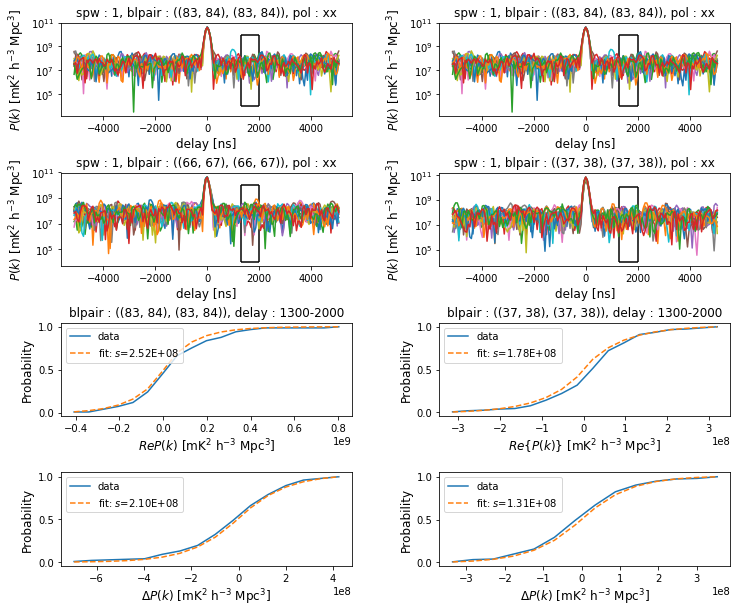

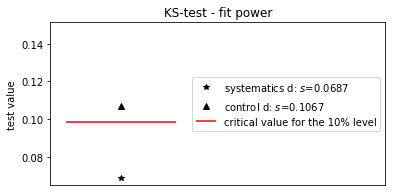

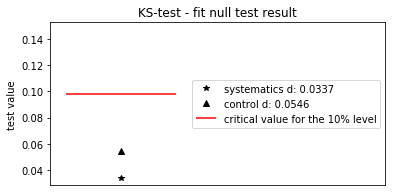

In [24]:
null_test(1300, 2000, 'no')

0.051685859854971816


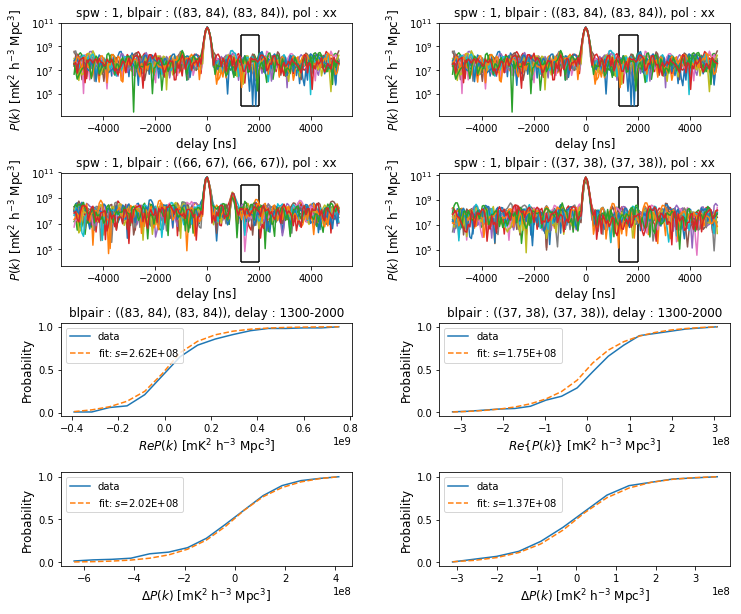

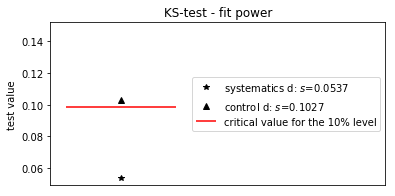

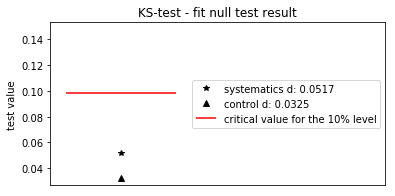

In [25]:
clean_null_test(1300, 2000, 'no')

In [ ]:
# # Simulate power values from Gaussian distributed visibilities
# power = {}
# for i in range(3):
#     p = []
#     for j in range(14):
#         x = np.random.normal(size=(2, 340)).view(np.complex128)
#         z = x[0, :] * x[1, :]
#         p.append(z.real)
#     power[i] = np.asarray(p)
    
# power1 = power[0]
# power2 = power[1]
# power3 = power[2]

null_test(1300, 2000, 'no')

data = power[2][:,2:168].flatten()
y, x = np.histogram(data, bins='auto', density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0

power_popt=curve_fit(real_pdf, x, y, p0=np.std(data))[0]

plt.figure()
plt.hist(data,bins='auto', density=True, histtype='step')
fitx = np.linspace(min(data), max(data), 500)
plt.plot(fitx, real_pdf(fitx, *power_popt), '--', label='fit: $s$=%.2E' % tuple(power_popt))
plt.show()

d = ks_test(data, real_pdf, np.std(data))[0]
c = ks_test(data, real_pdf, np.std(data))[1]
d, c

data = power2[:,2:168].flatten() - power1[:,2:168].flatten()
ks_test(data, null_pdf, np.std(data))[0]

Text(0.5, 1.0, 'KS-test')

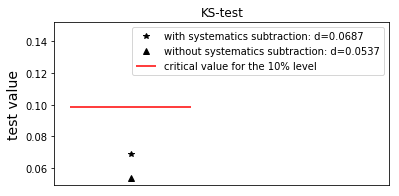

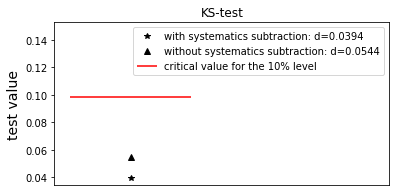

In [292]:
power_popt = []

data = power1[:,107:118].flatten()
y, x = np.histogram(data, bins='auto', density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0
power_popt.append(curve_fit(real_pdf, x, y, p0=np.std(data))[0])


data = cpower1[:,107:118].flatten()
y, x = np.histogram(data, bins='auto', density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0
power_popt.append(curve_fit(real_pdf, x, y, p0=np.std(data))[0])


power_dn = []


data = power1[:,107:118].flatten()
counts, bin_edges = np.histogram (data, bins='auto', density=True)
cdf = np.cumsum(counts)
bin_edges_m = (bin_edges + np.roll(bin_edges, -1))[:-1] / 2.0
cdf_fit = np.cumsum(real_pdf(bin_edges_m[:], power_popt[0]))
power_dn.append(max(np.abs(cdf_fit/cdf_fit[-1]-cdf/cdf[-1])))

data = cpower1[:,107:118].flatten()
counts, bin_edges = np.histogram (data, bins='auto', density=True)
cdf = np.cumsum(counts)
bin_edges_m = (bin_edges + np.roll(bin_edges, -1))[:-1] / 2.0
cdf_fit = np.cumsum(real_pdf(bin_edges_m[:], power_popt[1]))
power_dn.append(max(np.abs(cdf_fit/cdf_fit[-1]-cdf/cdf[-1])))


power_cv = ks_test(data, real_pdf, np.std(data))[1]



dn = []

data = power2[:,107:118].flatten() - power1[:,107:118].flatten()
counts, bin_edges = np.histogram (data, bins='auto', density=True)
cdf = np.cumsum(counts)
bin_edges_m = (bin_edges + np.roll(bin_edges, -1))[:-1] / 2.0
cdf_fit = np.cumsum(null_pdf(bin_edges_m[:], power_popt[0]))
dn.append(max(np.abs(cdf_fit/cdf_fit[-1]-cdf/cdf[-1])))   


data = cpower2[:,107:118].flatten() - cpower1[:,107:118].flatten()
counts, bin_edges = np.histogram (data, bins='auto', density=True)
cdf = np.cumsum(counts)
bin_edges_m = (bin_edges + np.roll(bin_edges, -1))[:-1] / 2.0
cdf_fit = np.cumsum(null_pdf(bin_edges_m[:], power_popt[1]))
dn.append(max(np.abs(cdf_fit/cdf_fit[-1]-cdf/cdf[-1])))   


cv = ks_test(data, null_pdf, np.std(data))[1]


plt.figure(figsize=(6, 3))
plt.plot(2, power_dn[0], 'k*', label='with systematics subtraction: d=%.4f' % power_dn[0])
plt.plot(2, power_dn[1], 'k^', label='without systematics subtraction: d=%.4f' % power_dn[1])
plt.plot(10, cv*1.5, alpha=0)
plt.hlines(cv, 0, 4, 'r', label='critical value for the 10% level')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.legend(loc='upper right')
plt.ylabel('test value', fontsize=14)
plt.savefig('ks_test_null.png')
plt.title('KS-test')

plt.figure(figsize=(6, 3))
plt.plot(2, dn[0], 'k*', label='with systematics subtraction: d=%.4f' % dn[0])
plt.plot(2, dn[1], 'k^', label='without systematics subtraction: d=%.4f' % dn[1])
plt.plot(10, cv*1.5, alpha=0)
plt.hlines(cv, 0, 4, 'r', label='critical value for the 10% level')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.legend(loc='upper right')
plt.ylabel('test value', fontsize=14)
plt.title('KS-test')

IndexError: invalid index to scalar variable.

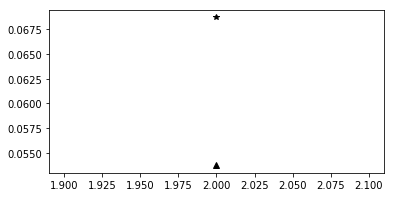

In [291]:
plt.figure(figsize=(6, 3))
plt.plot(2, power_dn[0], 'k*', label='systematics d: $s$=%.4f' % power_dn[0])
plt.plot(2, power_dn[1], 'k^', label='control d: $s$=%.4f' % power_dn[1])
plt.plot(11, power_cv[0]*1.5, alpha=0)
plt.hlines(power_cv[0], 0, 4, 'r', label='critical value for the 10% level')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.legend(loc='center right')
plt.ylabel('test value', fontsize=14)
plt.savefig('ks_test_power.png')
plt.title('KS-test - fit power')

In [294]:
np.exp(10000)

inf